# Linear Regression Using Mini-Batch Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)

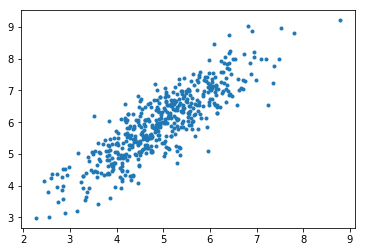

In [3]:
# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker = '.')
plt.show()

In [4]:
# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))

split_factor = 0.90
split = int(split_factor*data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split: , :-1]
y_test = data[split: , -1].reshape((-1, 1))

print("Number of examples in training set = %d"%(X_train.shape[0]))
print("Number of examples in testing set = %d"%(X_test.shape[0]))

Number of examples in training set = 7200
Number of examples in testing set = 800


In [5]:
# linear regression using "mini-batch" gradient descent
def hypothesis(X, theta):
    return np.dot(X, theta)

def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad

def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = int(0)
    for i in range(n_minibatches + 1):
        mini_batch = data[i*batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i*batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate*gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))
    return theta, error_list

In [6]:
theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

Bias =  [0.81830471]
Coefficients =  [[1.04586595]]


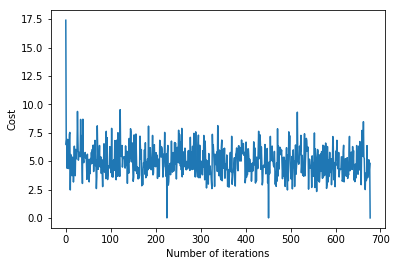

In [7]:
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

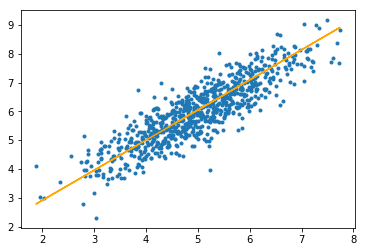

In [8]:
# predicting output for X_test
y_pred = hypothesis(X_test, theta)

plt.scatter(X_test[:, 1], y_test[:, ], marker = '.')
plt.plot(X_test[:, 1], y_pred, color = 'orange')
plt.show()

In [9]:
# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)

Mean absolute error =  0.4366644295854125
